Les importations de modules :

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy
import numpy as np
from scipy.special import kv, iv
import os
import time


Les fonctions utilisées sont :

Transformer un CSV en liste (good)

In [4]:

def ouverture_fichier(nomfichier):
    with open(nomfichier, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        xc = []
        i = 0
        for row in csvreader:
            xc.append(float(row[1]))
            i += 1
            if i >= 1000:
                break
    return xc

Parametres du circuit

In [ ]:
# Paramètres du circuit
omega = 0                       # Fréquence angulaire en rad/s
mu_0 = 0                        # Perméabilité du vide en Tm/A
mu = 0                          # Permeabilite du materiaux
mu_m = mu / mu_0                # µ/µ_0
a = 0                           # Rayon du solénoïde en m
n = 0                           # Nombre de spires du solénoïde
epsilon_0 = 0                   # Permittivité du vide en F/m
epsilon = 0                     # Permittivité de la tige en F/m
b = 0                           # Rayon de la tige conductrice en m
rho = 0                         # Résistivité de la tige conductrice en ohm/m

# Calculs supplémentaires
zeta = np.sqrt((omega ** 2) * mu_0 * epsilon_0)
eta = np.sqrt(zeta ** 2 - (omega ** 2) * mu_0 * epsilon_0)
gamma = b * np.sqrt(zeta ** 2 + (1j * omega * mu_m / rho) - (omega ** 2) * mu_m * epsilon)

# Fonctions de Bessels modifiées
I_0 = iv(0, gamma)
I_1 = iv(1, gamma)
K_0 = kv(0, eta * a)
K_1 = kv(1, eta * a)

Production CSV pour resistivite (finir la premiere fonciton : "calcul_resistivite")
Le reste devrait fonctioner

Calcul de la resistivite (NOT good)

In [ ]:
def calcul_resitivite() :
    Liste = []
    x = [1,2,3]
    for i in x :
        Liste.append(i)

    return Liste

Transformer une liste en CSV (Good)

In [ ]:

def list_to_csv(input_list, file_name):

    # Obtenir le chemin du dossier actuel
    current_directory = os.getcwd()
    # Combiner le chemin du dossier avec le nom du fichier
    file_path = os.path.join(current_directory, file_name)
    
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in input_list:
            writer.writerow([row])


Fonction permettant de faire tout le calcul et de produire le CSV (Good)

In [3]:

def Calcul_total(file_name) :
    Lresultat = calcul_resitivite()
    list_to_csv(Lresultat, file_name)

file = "Resistivite"
Calcul_total(file)

Generation de Graphiques a l'aide des deux CSV (good)

In [ ]:

#Recevoir/ouvrir CSV thermometre et resitivite

nom_fichier_temperature = "..."     # Remplacez "mon_fichier.csv" par le nom de votre fichier CSV
                                
nom_fichier_resistivite = "..."     # Remplacez "mon_fichier.csv" par le nom de votre fichier CSV

#Faire les variables x = resistivite | y = temperature

x = ouverture_fichier(nom_fichier_temperature)
print('temperature',x)  

y = ouverture_fichier(nom_fichier_resistivite)
print('resistivite',y)  

# Tracer le graphique
plt.plot(x, y)  
plt.xlabel('Température')  
plt.ylabel('Résistivité')  
plt.title('Graphique de la résistivite de l\'echantillon en fonction de la temperature')  
plt.grid(True)  
plt.show()  


Calcul des incertitudes

Incertitude de type A sur V (NOT good)

In [6]:

#Valeurs :

N = 1                                                    #Nombre de musures prises
lV = [1,2,3]                                             #Liste de toutes les mesures de voltage

def moyenne_liste(input_list):

    if len(input_list) == 0:
        return 0  
    else:
        return sum(input_list) / len(input_list)

Vmoy = moyenne_liste(lV)                            #moyenne des mesures de voltage       
Sig_Vmax = 1                                        #Écart-type de la valeur maximale de tension sur la distributions des mesures  

print(Vmoy, "+/-", Sig_Vmax/np.sqrt(N) )


2.0 +/- 1.0


Fonction d'attente (good)

In [ ]:

def attendre_fichier(nom_fichier, delai_attente=1):

    while not os.path.exists(nom_fichier):
        print(f"En attente du fichier {nom_fichier}...")
        time.sleep(delai_attente)

attendre_fichier(nom_fichier_resistivite)



Mettre des , devant CSV (good)

In [7]:

def modifier_virgule_csv(fichier_entree, fichier_sortie):

    with open(fichier_entree, 'r', newline='') as csv_entree, open(fichier_sortie, 'w', newline='') as csv_sortie:
        lecteur_csv = csv.reader(csv_entree)
        ecrivain_csv = csv.writer(csv_sortie)
        
        # Parcourir chaque ligne du fichier CSV
        for ligne in lecteur_csv:
            ligne_modifiee = []
            # Parcourir chaque élément de la ligne
            for element in ligne:
                try:
                    # Tente de convertir l'élément en un nombre
                    nombre = float(element)
                    # Si la conversion réussit, ajoute une virgule devant le nombre
                    ligne_modifiee.append(',' + element)
                except ValueError:
                    # Si la conversion échoue, conserve l'élément tel quel
                    ligne_modifiee.append(element)
            
            # Écrire la ligne modifiée dans le fichier de sortie
            csv_sortie.write(','.join(ligne_modifiee) + '\n')

Le fichier a été traité avec succès.


Ne garder que les 50 premieres valeurs du CSV (good)

In [9]:
import csv

def conserver_premieres_lignes(fichier_entree, nombre_lignes_conservees, fichier_sortie):
    # Ouvrir le fichier d'entrée en mode lecture et le fichier de sortie en mode écriture
    with open(fichier_entree, 'r', newline='') as csv_entree, open(fichier_sortie, 'w', newline='') as csv_sortie:
        lecteur_csv = csv.reader(csv_entree)
        ecrivain_csv = csv.writer(csv_sortie)
        
        # Parcourir chaque ligne du fichier CSV
        for indice_ligne, ligne in enumerate(lecteur_csv, start=1):
            # Écrire la ligne dans le fichier de sortie si elle est avant ou à la ligne spécifiée
            if indice_ligne <= nombre_lignes_conservees:
                ecrivain_csv.writerow(ligne)
            else:
                # Si on a atteint la ligne spécifiée, sortir de la boucle
                break

fichier_entree = "votre_fichier.csv"
fichier_sortie = "nouveau_fichier.csv"
nombre_lignes_conservees = 50
conserver_premieres_lignes(fichier_entree, nombre_lignes_conservees, fichier_sortie)




Supprimer premiere ligne CSV (good)

In [10]:
import csv

def supprimer_premiere_ligne(fichier_entree, fichier_sortie):
    lignes_restantes = []
    with open(fichier_entree, 'r', newline='') as csv_entree:
        lecteur_csv = csv.reader(csv_entree)
        # Ignorer la première ligne
        next(lecteur_csv)
        # Collecter les lignes restantes
        for ligne in lecteur_csv:
            lignes_restantes.append(ligne)
    
    # Écrire les lignes restantes dans le fichier de sortie
    with open(fichier_sortie, 'w', newline='') as csv_sortie:
        ecrivain_csv = csv.writer(csv_sortie)
        ecrivain_csv.writerows(lignes_restantes)

# Exemple d'utilisation de la fonction
fichier_entree = "Temperature"
fichier_sortie = "Temperature2"
supprimer_premiere_ligne(fichier_entree, fichier_sortie)


Supprimer un fichier CSV (good)

In [ ]:
import os

def supprimer_fichier(fichier):
    try:
        os.remove(fichier)
        print(f"Le fichier {fichier} a été supprimé avec succès.")
    except FileNotFoundError:
        print(f"Le fichier {fichier} n'existe pas.")
    except Exception as e:
        print(f"Une erreur s'est produite lors de la suppression du fichier : {e}")

# Exemple d'utilisation de la fonction
fichier_a_supprimer = "votre_fichier.csv"
supprimer_fichier(fichier_a_supprimer)


generer csv (0,600)

In [1]:
import csv

# Fonction pour écrire les nombres dans le fichier CSV
def generate_csv(filename, start, end):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        for i in range(start, end+1):
            csv_writer.writerow([i])

# Appel de la fonction pour générer le fichier CSV
generate_csv('comptage.csv', 0, 650)

Incertitue de type B sur V

In [ ]:
#code

Incertitude de totale de V

In [ ]:
#code

Propagation de l'incertitude de V

In [ ]:
#code

Incertitude résistance R

In [ ]:
#code

Incertitude résitivite p

In [ ]:
#code

Calculer le dephasage entre les sinus

Tracer les deux signaux sinusoïdaux


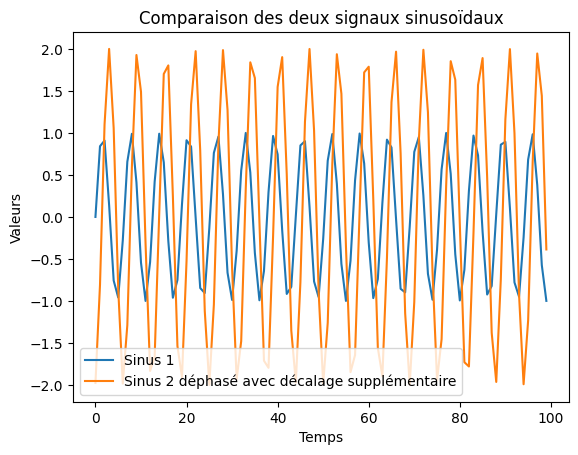

Tracer sin avec derive


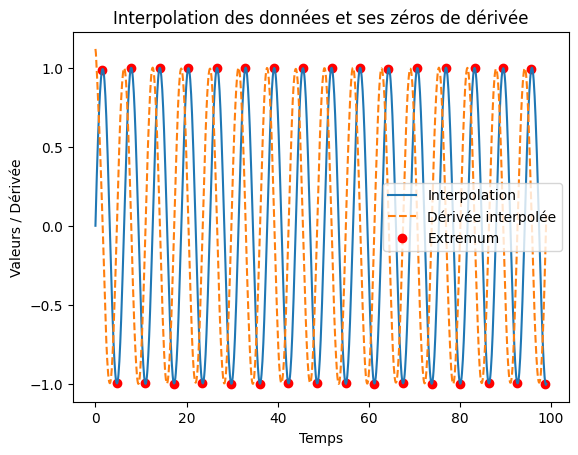

Tracer sin avec derive


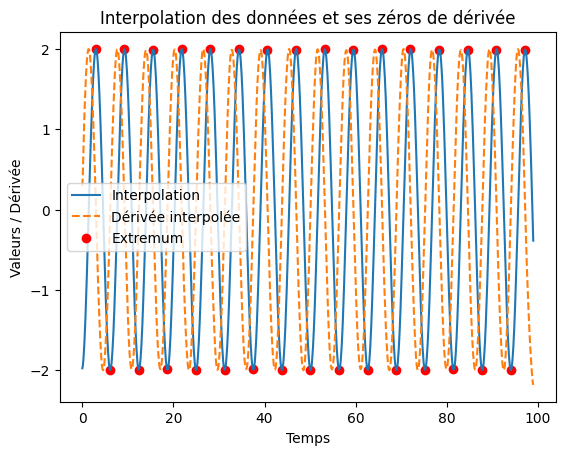

Valeur max de sin1 0.9989459564676101
Valeur max de sin2 1.9996683700364486
Index de la valeur maximale dans Valeurs_1: 16
Index de la valeur maximale dans Valeurs_2: 0
Instant correspondant dans temps_1: 51.82882882882883
Instant correspondant dans temps_2: 2.972972972972973
La difference de decalage est de -48.85585585585586


In [79]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

longueur = 100
sinus_1 = [np.sin(i) for i in range(longueur)]
phase_shift_supplementaire = 30
sinus_2 = [2* np.sin(i + phase_shift_supplementaire) for i in range(longueur)]

T = list(range(100))

print('Tracer les deux signaux sinusoïdaux')
plt.plot(range(longueur), sinus_1, label='Sinus 1')
plt.plot(range(longueur), sinus_2, label='Sinus 2 déphasé avec décalage supplémentaire')
plt.xlabel('Temps')
plt.ylabel('Valeurs')
plt.title('Comparaison des deux signaux sinusoïdaux')
plt.legend()
plt.show()

def traitement_sinus(sinus) :
    # Générer une liste de valeurs de sinus pour la première fonction
    A = sinus

    T = list(range(100))

    # Créer une fonction d'interpolation
    f = interp1d(T, A, kind='cubic')

    # Générer une plage de temps pour évaluer la fonction
    temps_interp = np.linspace(min(T), max(T), 1000)

    # Calculer les valeurs interpolées
    valeurs_interp = f(temps_interp)

    # Calculer la dérivée numérique
    dx = temps_interp[1] - temps_interp[0]
    derivee_interp = np.gradient(valeurs_interp, dx)

    # Trouver les zéros de la dérivée
    zeros_indices = np.where(np.diff(np.sign(derivee_interp)))[0]

    # Afficher les zéros de la dérivée
    zeros_temps = temps_interp[zeros_indices]
    zeros_valeurs = valeurs_interp[zeros_indices]

    print('Tracer sin avec derive')
    plt.plot(temps_interp, valeurs_interp, '-', label='Interpolation')
    plt.plot(temps_interp, derivee_interp, '--', label='Dérivée interpolée')
    plt.scatter(zeros_temps, zeros_valeurs, color='red', label='Extremum')
    plt.xlabel('Temps')
    plt.ylabel('Valeurs / Dérivée')
    plt.title('Interpolation des données et ses zéros de dérivée')
    plt.legend()
    plt.show()
    return zeros_valeurs,zeros_temps

Valeurs_1, temps_1 = traitement_sinus(sinus_1)
Valeurs_2, temps_2 = traitement_sinus(sinus_2)

# Trouver l'indice de la valeur maximale dans Valeurs_1
index_max_1 = np.argmax(Valeurs_1)

# Trouver l'instant correspondant dans temps_1
temps_max_1 = temps_1[index_max_1]

# Trouver l'indice de la valeur maximale dans Valeurs_2
index_max_2 = np.argmax(Valeurs_2)

# Trouver l'instant correspondant dans temps_2
temps_max_2 = temps_2[index_max_2]

print('Valeur max de sin1', np.max(Valeurs_1))
print('Valeur max de sin2', np.max(Valeurs_2))
print("Index de la valeur maximale dans Valeurs_1:", index_max_1)
print("Index de la valeur maximale dans Valeurs_2:", index_max_2)

print("Instant correspondant dans temps_1:", temps_max_1)
print("Instant correspondant dans temps_2:", temps_max_2)
print('La difference de decalage est de',temps_max_2 - temps_max_1)
